In [1]:
import sys
print(sys.version)

3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [2]:
%pylab inline
import pandas as pd
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [17]:
# Read csv without with 'Date' column as regular column instead of
# index (it's the default behaviour).

marketPriceDf = pd.read_csv('data-set-ordered.csv',
                            usecols = ['Date', 'MarketPrice'],
                            parse_dates=True,
                            index_col=0,
                            squeeze=True)

In [18]:
# marketPriceDf = marketPriceDf.asfreq('D')
marketPriceDf.interpolate(inplace=True)

In [20]:
marketPriceDf.index

DatetimeIndex(['2009-01-03', '2009-01-04', '2009-01-05', '2009-01-06',
               '2009-01-07', '2009-01-08', '2009-01-09', '2009-01-10',
               '2009-01-11', '2009-01-12',
               ...
               '2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
               '2016-04-22', '2016-04-23', '2016-04-24', '2016-04-25',
               '2016-04-26', '2016-04-27'],
              dtype='datetime64[ns]', name='Date', length=2639, freq=None)

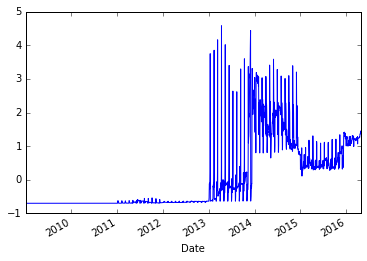

In [19]:
marketPriceDf.plot()

In [15]:
import importlib
importlib.reload(sm)

<module 'statsmodels.api' from '/home/zaka/anaconda2/envs/py3k/lib/python3.5/site-packages/statsmodels/api.py'>

In [16]:
# TODO: tsa.seasonal_decompose needs a DataFrame with DatetimeIndex
# as the index.
# Code found at:
# http://stackoverflow.com/questions/20672236/time-series-decomposition-function-in-python
# s = sm.tsa.seasonal_decompose(marketPriceDf, freq = 'D')
s = sm.tsa.seasonal_decompose(marketPriceDf)

/home/zaka/anaconda2/envs/py3k/lib/python3.5/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


In [8]:
# Send question to stackoverflow about DatetimeIndex not plotting correctly
# First order and interpolate the data-set.csv

In [9]:
# TODO: Try to convert back and forth between DatetimeIndex and
# datetime.datetime in order to work with seasonal_decompose and
# been able to plot it.